# This code represents an implementation of the k-Means  Clustering algorithm using Lloyd's Algorithm without using libraries that would give us the clusters directly

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
def read_df( path ):
    return pd.read_csv( path, header = None )

def cluster_index( df, Y ):
    
    #Get the distance matrix which measures euclidean distance between rows of df and Y
    distanceMatrix = euclidean_distances( df, Y )
    
    #Return the index of the column that has minimun value as this would identify the closest centroid
    #and the average distance
    return ( np.argmin( distanceMatrix, axis=1 ), np.mean( np.amin( distanceMatrix, axis=1 ) ) )

In [3]:
def lloyds_kmean( path, k, tol ):
    
    #Reading the file
    df = read_df( path )
    
    #Initialization
    Y = df.sample( k )    #samples k points from df uniformly and stores them into Y
    Y.index  = list( range( len( Y.index ) ) )    #Replacing index values with regular 0,1,2,3,..,k-1
    
    #Initializing D to have very large value and D_ to have value less than D - tolerance to allow looping
    D = 1e5
    D_ = D - (tol + 7)
    
    while D - D_ > tol:
        D = D_
        #Assigning cluster index to each row of df and getting average distance
        C, D_ = cluster_index( df, Y )

        #Update Y with new centroids by calculating means of clusters
        for i in Y.index:
            Y.loc[i] = df.loc[df.index[C == i]].mean()
            
    #Return Y, C and D_
    return( Y, C, D_ )
        

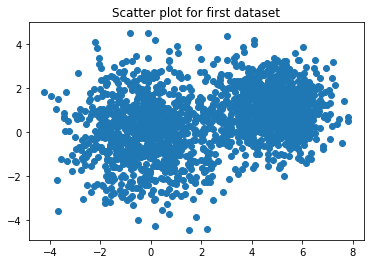

In [4]:
trial_df = pd.read_csv("clustering.csv", header=None)
plt.scatter(trial_df[0],trial_df[1])
plt.title("Scatter plot for first dataset")
#plt.savefig("Scatter plot for first dataset")
plt.show()

In [5]:
Y, Cluster_index, D_ = lloyds_kmean( "clustering.csv", 2, 1e-5 )

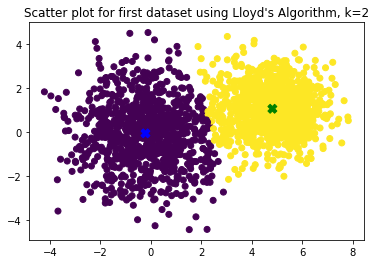

Cost=  1.52461153582


In [7]:
plt.scatter(trial_df[0], trial_df[1], c=Cluster_index)
plt.scatter(Y[0],Y[1], marker = "X", color = ['blue', 'green'], s =80)
plt.title("Scatter plot for first dataset using Lloyd's Algorithm, k=2")
#plt.savefig("Scatter plot for first dataset using Lloyd's Algorithm")
plt.show()
print("Cost= ",D_)

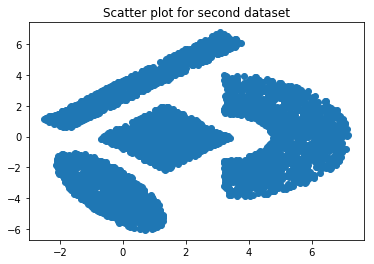

In [8]:
trial_df = pd.read_csv("ShapedData.csv", header=None)
plt.scatter(trial_df[0],trial_df[1])
plt.title("Scatter plot for second dataset")
#plt.savefig("Scatter plot for second dataset")
plt.show()

In [9]:
#Calling the Lloyd's Algorithm function defined above for the Shaped Data with 4 clusters
Y, Cluster_index, D_ = lloyds_kmean( "ShapedData.csv", 4, 1e-5 )

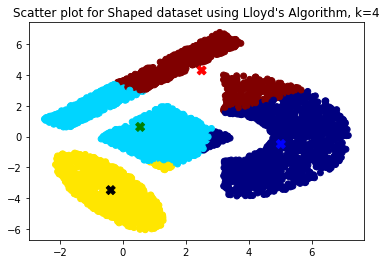

Cost=  1.64518811743


In [10]:
norm = plt.Normalize()
plt.scatter(trial_df[0], trial_df[1], c = plt.cm.jet(norm(Cluster_index)))
plt.scatter(Y[0],Y[1], marker = "X", color = ['blue', 'green','black','red'], s =80)
plt.title("Scatter plot for Shaped dataset using Lloyd's Algorithm, k=4")
plt.show()
print("Cost= ",D_)